In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tools import parse_file, rescale, gen_borders, gen_grid

In [3]:
a = gen_borders(0, 3, 0, 3)

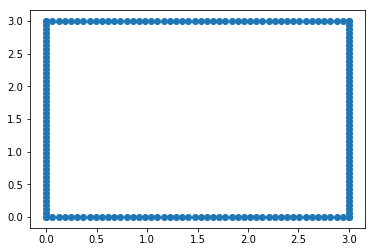

In [4]:
plt.scatter(a[:, 0], a[:, 1])

In [5]:
points = rescale(parse_file("../resources/demo4.mod1"), 0.1, 0.9)
points[:, :-1] += 1
points = np.vstack([points, gen_borders(0, 3, 0, 3)])

Possible ways of interpolating surface:
* Inverse Distance Weighting
* Splines
* Kriging
  - [Gaussian Process Regressor](https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-regression-gpr)
  - [Simple Kriging in Python](http://connor-johnson.com/2014/03/20/simple-kriging-in-python/)

## Inverse distance interpolation

Given $N$-tuple of points $(x_1, y_1, z_1), \dots, (x_N, y_N, z_N)$, we can then interpolate any point like this. First we define *inverse distance weighting* function:
$$w_i(x)=d(x, x_i)^{-p}$$ where $d$ is usually Euclidean distance.

We want to interpolate $x$ and calculate weight of *known* points $x_i$ as inverse of distance from $x$ to $x_i$ raised to some power $p$ inversed. Hence, the farther the known point $x_i$ is, the lesser the weight would be.

Then our interpolated value $u(x)$ is weighted average of values of *known* points $x_i$:
$$u(x)=\frac{\sum_{i=1}^{N}w_i(x)u_i}{\sum_{i=1}^{N}w_i(x)}$$

$u(x)$ is, in our case, height of the point.

In [13]:
class Estimation():
        def __init__(self,datax,datay,dataz):
            self.x = datax
            self.y = datay
            self.v = dataz

        def estimate(self,x,y,using='ISD'):
            """
            Estimate point at coordinate x,y based on the input data for this
            class.
            """
            if using == 'ISD':  # inverse squared distance
                return self._isd(x,y)

        def _isd(self,x,y, p=-2):
            d = np.sqrt((x-self.x)**2+(y-self.y)**2)
            if d.min() > 0:
                v = np.sum(self.v * d ** p / np.sum(d ** p))
                return v
            else:
                return self.v[d.argmin()]

In [14]:
e = Estimation(points[:, 0], points[:, 1], points[:, 2])

In [19]:
NUM_POINTS = 200
surf = np.zeros((NUM_POINTS, NUM_POINTS))
xx, yy = gen_grid(0, 3, 0, 3, NUM_POINTS)
for i in range(NUM_POINTS):
    for j in range(NUM_POINTS):
        surf[i, j] = e.estimate(xx[i, j], yy[i, j])

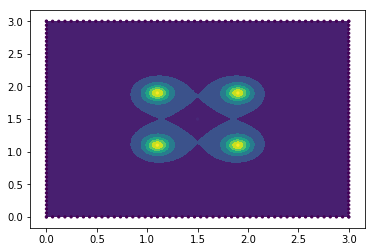

In [20]:
plt.contourf(xx, yy, surf)
plt.scatter(points[:, 0], points[:, 1], c=points[:, 2], s=5);

Not exactly what we're looking for. It's obvious that demos are generated using some different method.